# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [4]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv"
measles_data = read_csv(url)

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [10]:
# create the df_vacc_rates here
df_vacc_rates = measles_data %>%
  filter(mmr >= 0) %>%  # -1 값을 가진 결측치 필터링
  group_by(state) %>%
  summarize(
    total_schools = n(),  # 전체 학교 수
    schools_above_95 = sum(mmr >= 95),  # 95% 이상의 접종률을 가진 학교 수
    fraction_above_95 = schools_above_95 / total_schools  # 비율 계산
  ) %>%
    arrange(fraction_above_95)

print(df_vacc_rates, n = Inf)


# A tibble: 21 × 4
   state         total_schools schools_above_95 fraction_above_95
   <chr>                 <int>            <int>             <dbl>
 1 Arkansas                567                2           0.00353
 2 Washington             1978              646           0.327  
 3 North Dakota            360              164           0.456  
 4 Maine                   357              169           0.473  
 5 Minnesota              1593              755           0.474  
 6 Ohio                   2919             1435           0.492  
 7 Arizona                1171              593           0.506  
 8 Oregon                  806              478           0.593  
 9 Colorado               1507              939           0.623  
10 Texas                   811              508           0.626  
11 Utah                    603              410           0.680  
12 Missouri                700              476           0.68   
13 Vermont                 338              231          

Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95%.

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

Warning message in geom_text(aes(x = 85, y = 0.75, label = "CDC recommended\nvaccination rate\n(95%)"), :
“All aesthetics have length 1, but the data has 2084 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 92, y = 0.75, xend = 95, yend = 0.65), arrow = arrow(length = unit(0.02, :
“All aesthetics have length 1, but the data has 2084 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


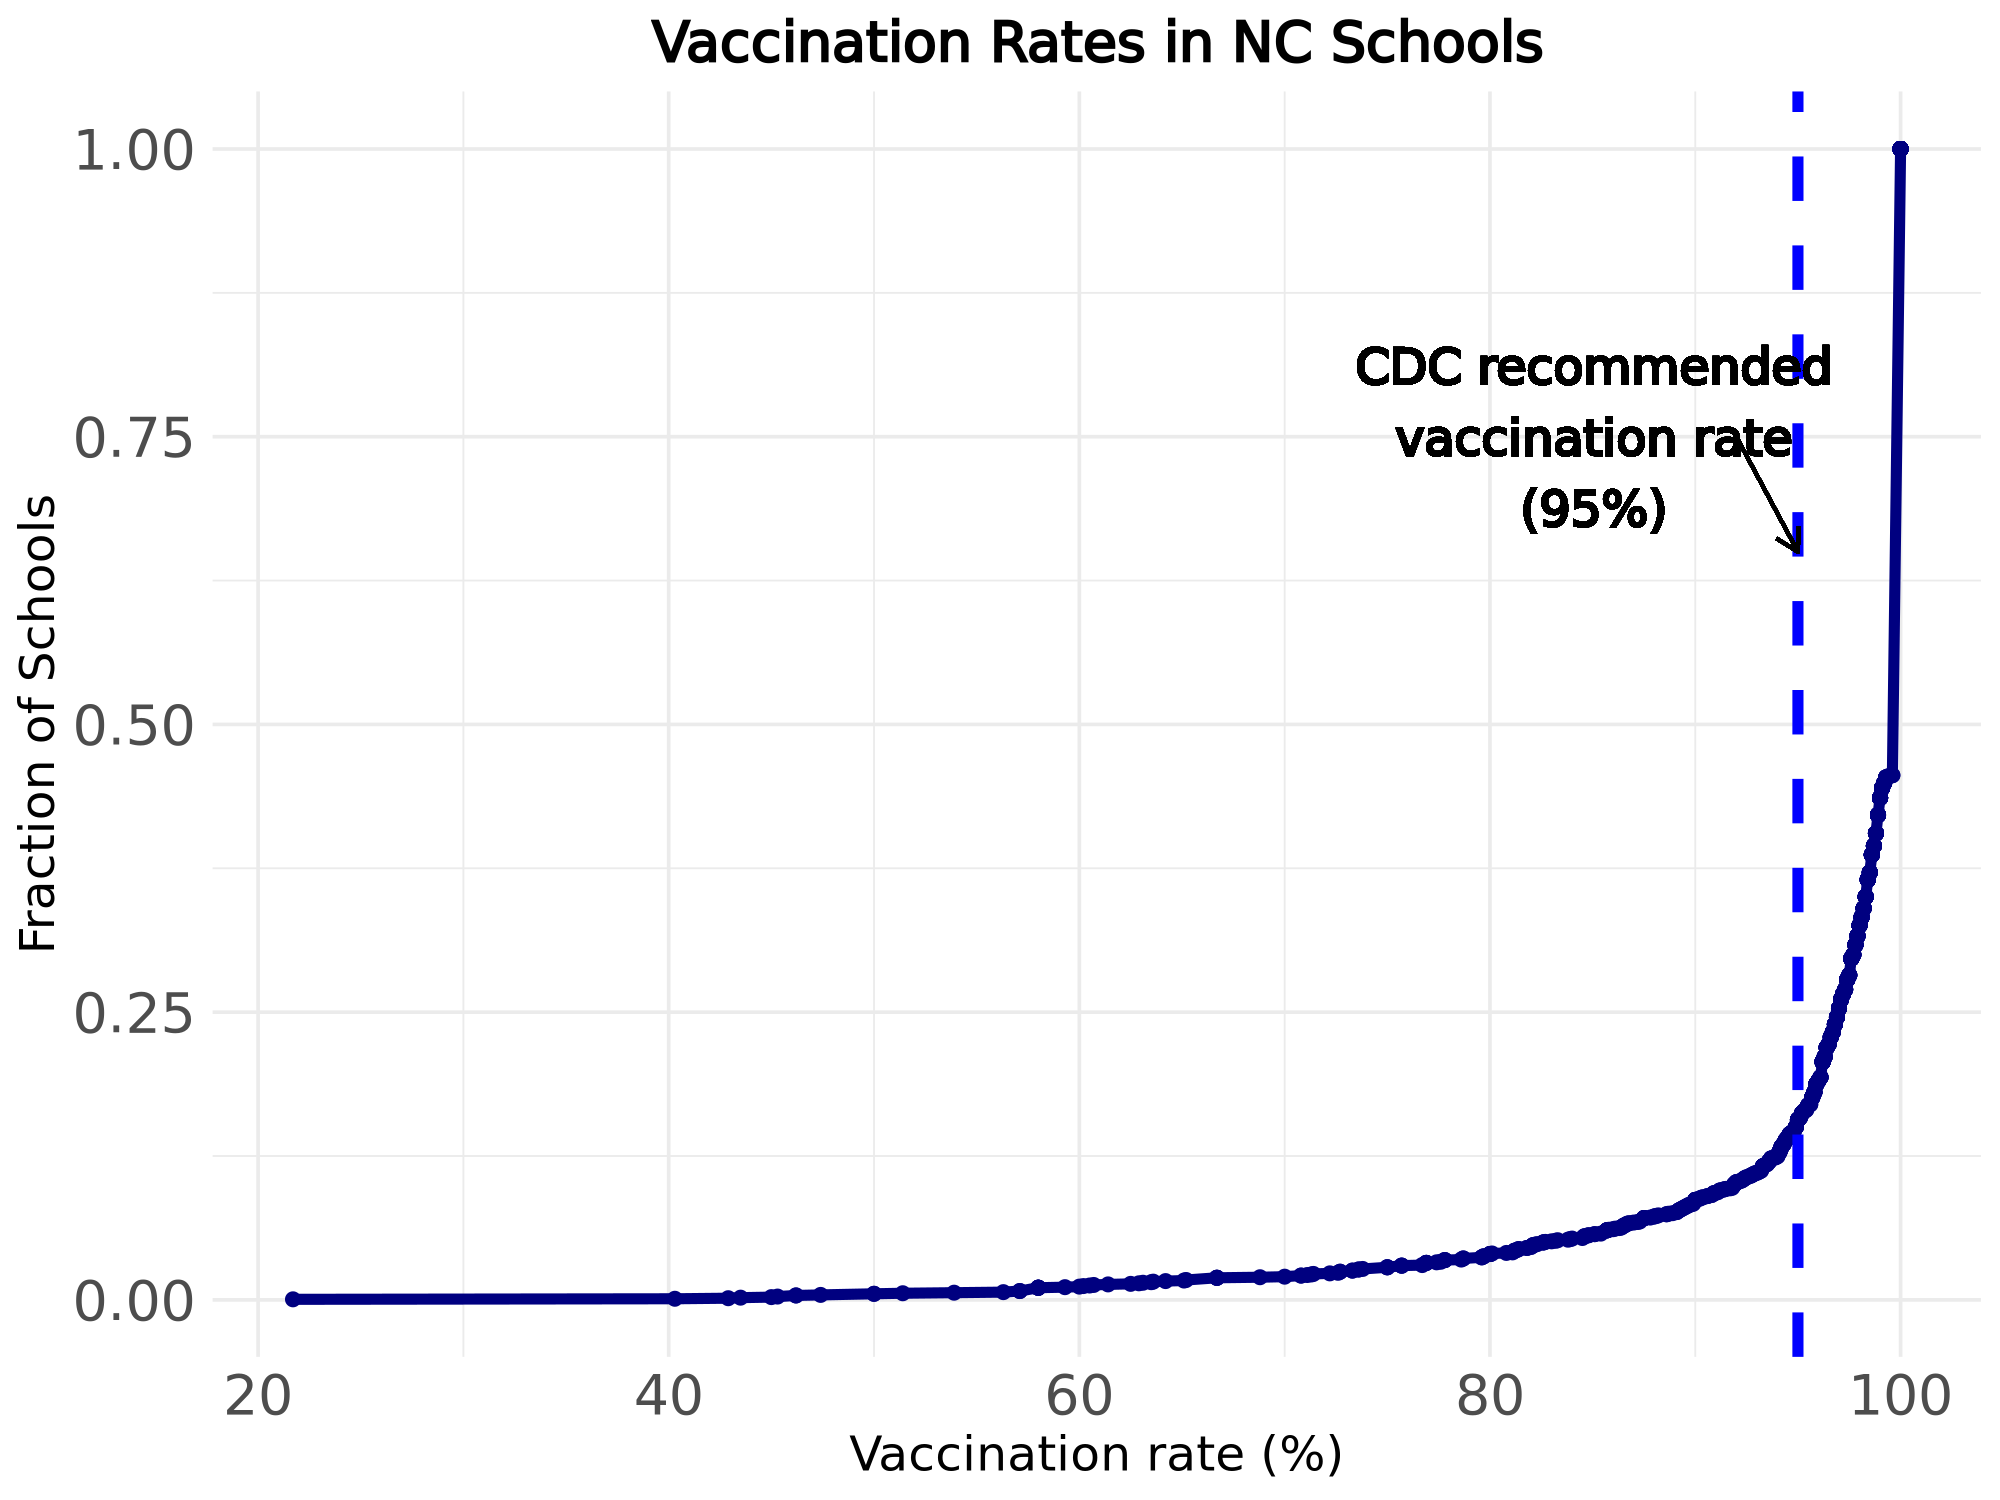

In [46]:
library(ggrepel)
options(repr.plot.res = 250, repr.plot.height = 6, repr.plot.width = 8)

# North Carolina 주 데이터를 필터링
nc_data = measles_data %>%
  filter(state == "North Carolina", overall >= 0)  # overall 값이 있는 데이터만 사용

# ECDF 값 계산
nc_data = nc_data %>%
  mutate(ecdf_value = cume_dist(overall))

# ECDF 플롯 생성
nc_vacc_rate = 
ggplot(nc_data, aes(x = overall, y = ecdf_value)) +
  geom_line(color = "navy", linewidth = 1.5) +  # 선 색상 및 두께 설정
  geom_point(color = "navy", size = 1.5) +  # 곡선 위에 동그라미 추가
  geom_vline(xintercept = 95, linetype = "dashed", color = "blue", size = 1.5) +  # 95% 기준선 추가
  geom_text(aes(x = 85, y = 0.75, 
                label = "CDC recommended\nvaccination rate\n(95%)"), 
            color = "black", hjust = 0.5, size = 5, fontface = "bold") +  # 텍스트 3줄로 나누기
  geom_segment(aes(x = 92, y = 0.75, xend = 95, yend = 0.65), 
               arrow = arrow(length = unit(0.02, "npc")), 
               color = "black") +
  labs(
    title = "Vaccination Rates in NC Schools",
    x = "Vaccination rate (%)",
    y = "Fraction of Schools"
  ) +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 14),  # x, y축 제목의 크기 설정
    axis.text = element_text(size = 16),   # x, y축 텍스트 크기 설정
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)  # 제목 크기 및 굵기 설정
  )

nc_vacc_rate

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [48]:
nc_median_vacc_rate <- nc_data %>%
  summarize(median_vacc_rate = median(overall, na.rm = TRUE))

# 중앙값 출력
print(nc_median_vacc_rate)

# CDC 권장 목표(95%)와 비교
if (nc_median_vacc_rate$median_vacc_rate > 95) {
  print("The median vaccination rate in NC schools is above the CDC recommended target of 95%.")
} else {
  print("The median vaccination rate in NC schools is below the CDC recommended target of 95%.")
}

# A tibble: 1 × 1
  median_vacc_rate
             <dbl>
1              100
[1] "The median vaccination rate in NC schools is above the CDC recommended target of 95%."
